In [ ]:
#determine how age effects insurance costs
#scatterplot with age on x and cost on y
#fit model linearregression and make predictions
#plot another scatterplot with best fit line

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#import data
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


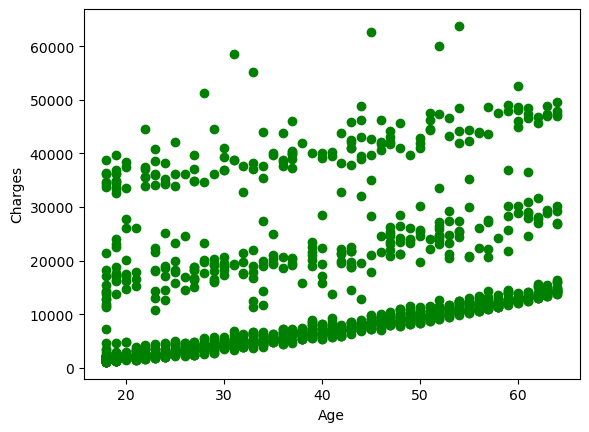

In [3]:
#scatterplot with age and cost
x = insurance_data.iloc[:,:1].values
y = insurance_data.iloc[:,-1].values
plt.scatter(x,y,color = 'g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

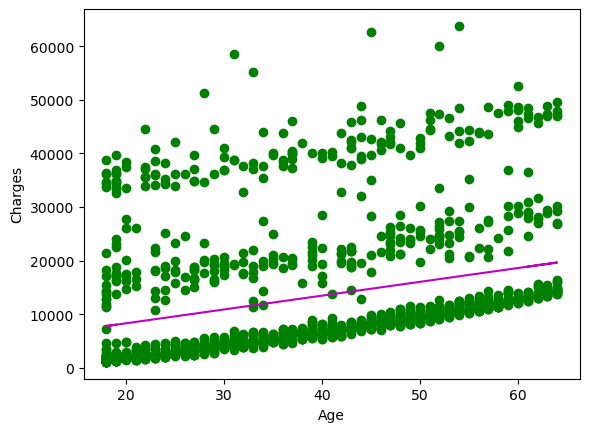

In [4]:
#fit the model, plot data and model
insurance_model = LinearRegression()
insurance_model.fit(x,y)
y_pred = insurance_model.predict(x)

plt.scatter(x,y,color = 'g')
plt.plot(x,y_pred,color = 'm')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

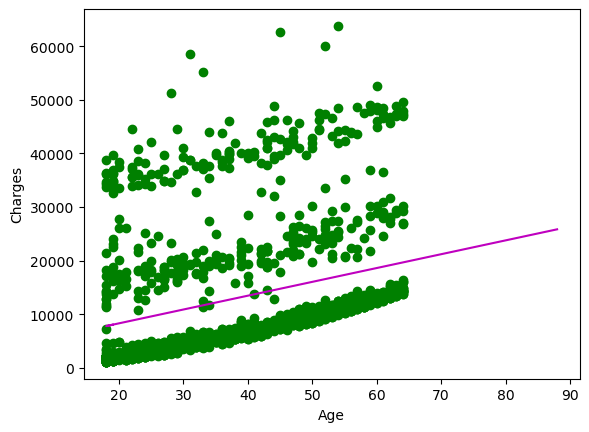

Insurance charges if aged 88 are predicted at:	£ [25845.48]


In [5]:
#predictions
unknown_x =[[88]]
x_pred = np.append(x,unknown_x).reshape(-1,1)
y_pred = insurance_model.predict(x_pred)

plt.scatter(x,y,color='g')
plt.plot(x_pred,y_pred,color='m')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

print("Insurance charges if aged 88 are predicted at:\t£",insurance_model.predict(unknown_x).round(decimals =2))

In [6]:
#exploring data further for a better fit linear regression
#starting with standard deviation to see how spread out the data is
import numpy as np
charges= insurance_data['charges']
std_charges = np.std(charges)
print("Charges",std_charges)

age= insurance_data['age']
std_age = np.std(age)
print("Age", std_age)

Charges 12105.484975561605
Age 14.04470903895454


In [7]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
#checking data types to see if need to convert
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
#top 10 of largest by charges
max_charges = insurance_data.nlargest(10,['charges'])
print(max_charges)

      age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
34     28    male  36.400         1    yes  southwest  51194.55914
1241   64    male  36.960         2    yes  southeast  49577.66240
1062   59    male  41.140         1    yes  southeast  48970.24760
488    44  female  38.060         0    yes  southeast  48885.13561


In [55]:
#top 10 of smallest by charges
min_charges = insurance_data.nsmallest(10,['charges'])
print(min_charges)

      age   sex    bmi  children smoker     region    charges
940    18  male  23.21         0     no  southeast  1121.8739
808    18  male  30.14         0     no  southeast  1131.5066
1244   18  male  33.33         0     no  southeast  1135.9407
663    18  male  33.66         0     no  southeast  1136.3994
22     18  male  34.10         0     no  southeast  1137.0110
194    18  male  34.43         0     no  southeast  1137.4697
866    18  male  37.29         0     no  southeast  1141.4451
781    18  male  41.14         0     no  southeast  1146.7966
442    18  male  43.01         0     no  southeast  1149.3959
1317   18  male  53.13         0     no  southeast  1163.4627


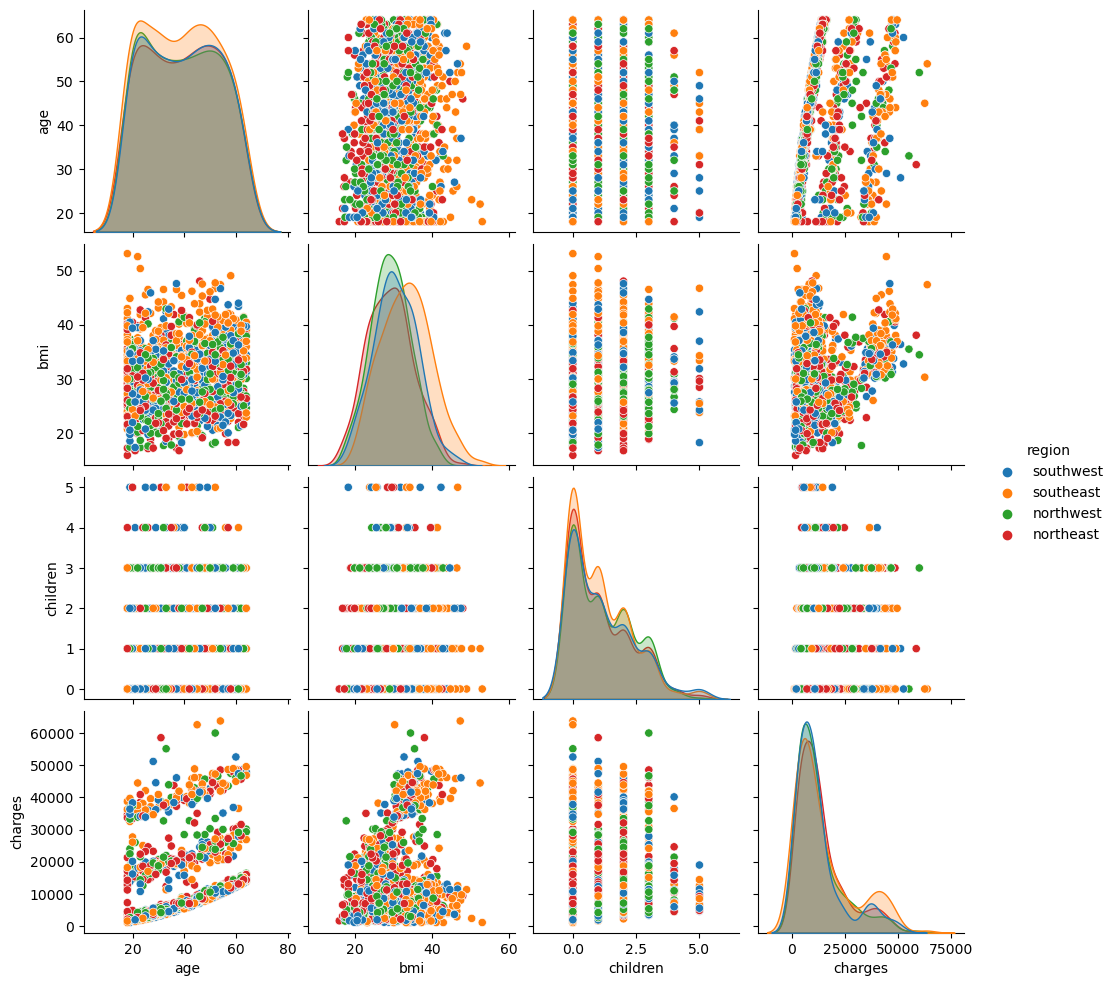

In [53]:
#exploring data by region to look at regional performance
sns.pairplot(insurance_data,hue='region')

In [ ]:
#charges percentile breakdown


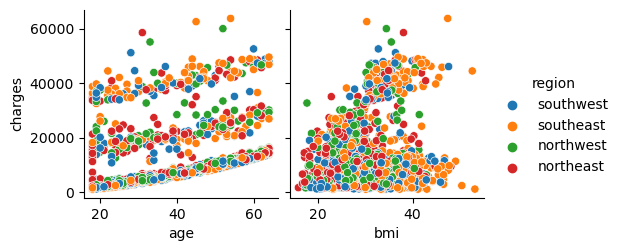

In [56]:
#taking a closer look at the interplay between region, age, bmi and charges
sns.pairplot(insurance_data,x_vars=['age','bmi'],y_vars=['charges'],hue='region')

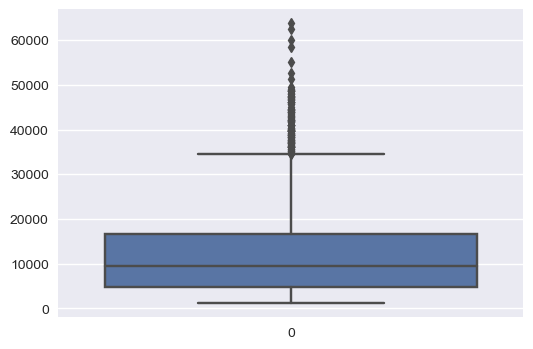

In [54]:
#looking for outliers in charges using boxplot- can see there are 'lots' above the 75th percentile.
plt.figure(figsize=(6,4))
sns.boxplot(insurance_data['charges'])
plt.show()

In [9]:
#finding the IQR and trimming data
def noOutliers(insurance_data,charges):
    Q3 = np.quantile(insurance_data['charges'],0.75)
    Q1 = np.quantile(insurance_data['charges'],0.25)
    IQR= Q3 - Q1
    
    print("IQR for charges is:\t",(charges,IQR))
    global remove_outlier_list
    global filtered_insurance
    
    low_range = Q1 - 1.5 * IQR
    up_range = Q3 + 1.5 * IQR
    remove_outlier_list = [x for x in insurance_data['charges'] if (
        (x > low_range) & (x < up_range))]
    filtered_insurance = insurance_data.loc[insurance_data['charges'].isin(remove_outlier_list)]
    
for i in insurance_data.columns:
        if i ==insurance_data.columns[0]:
            noOutliers(insurance_data,i)
        else:
            noOutliers(filtered_insurance,i)

insurance_data2 = filtered_insurance
print(insurance_data2.shape)
insurance_data2.describe()


IQR for charges is:	 ('age', 11899.625365)
IQR for charges is:	 ('sex', 8544.8987)
IQR for charges is:	 ('bmi', 7983.500837500002)
IQR for charges is:	 ('children', 7768.148337500001)
IQR for charges is:	 ('smoker', 7731.757524999999)
IQR for charges is:	 ('region', 7732.9848624999995)
IQR for charges is:	 ('charges', 7732.9848624999995)
(1116, 7)


,age,bmi,children,charges
count,1116.000000,1116.000000,1116.000000,1116.000000
mean,38.465950,30.159547,1.077957,8584.026246
std,13.870694,6.098525,1.217296,5422.236782
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4146.682675
50%,38.000000,29.810000,1.000000,7728.449475
75%,50.000000,33.990000,2.000000,11879.667537
max,64.000000,53.130000,5.000000,23401.305750


In [ ]:
#can see that this has removed  222 rows (count 1338 to 1116)
# this has also reduced the maximum charge to 23,401 from 63,770.

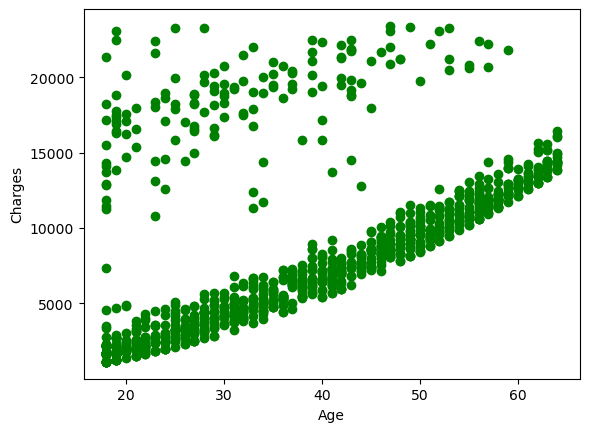

In [10]:
#remodelled scatterplot with age and charges
x = insurance_data2.iloc[:,:1].values
y = insurance_data2.iloc[:,-1].values
plt.scatter(x,y,color = 'g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

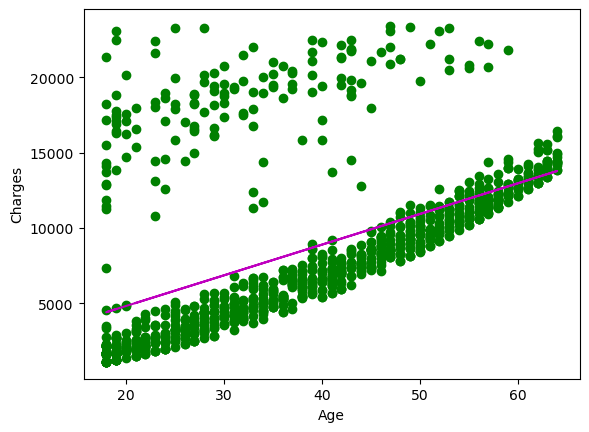

In [11]:
#better fit linear regression
insurance_model2 = LinearRegression()
insurance_model2.fit(x,y)
y_pred = insurance_model2.predict(x)

plt.scatter(x,y,color = 'g')
plt.plot(x,y_pred,color = 'm')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

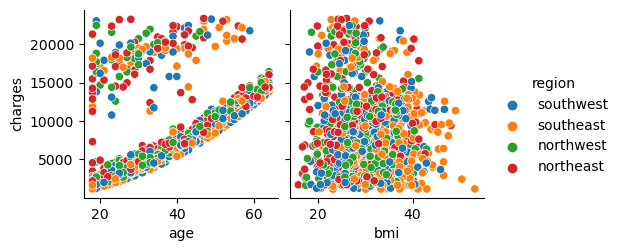

In [19]:
#taking another look at charges and age per region- plus comparison to bmi
sns.pairplot(insurance_data2,x_vars=['age','bmi'],y_vars=['charges'],hue='region')

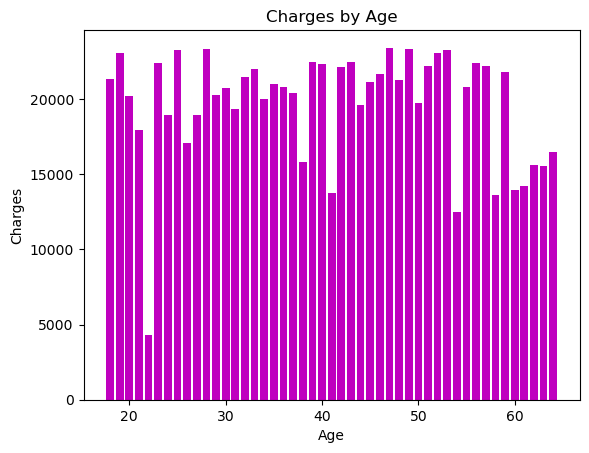

In [26]:
#looking at different method to view charges by region 
#can see how southwest, northeast, southeast are similar in terms of charges 
import matplotlib.pyplot as plt
import pandas as pd

df= pd.DataFrame(insurance_data2)
x = list(df.iloc[:, 0])
y = list(df.iloc[:, 6])
cols=['m']

#plot the bar
plt.bar(x,y,color = cols)
plt.title ('Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()        